# Data Forecasting

The module is in charge of: 
- forecasting the value of temperature in the next X seconds; 
- forecasting the value of humidity in the next X seconds; 
- forecasting the value of the gas sensor in the next X seconds 

(X is defined by users or developers). 

The time-series of the predicted values must be saved on INFLUX and shown on the GRAFANA dashboard as well; e.g. by using two lines for the temperature graph, one related to raw measurements, one to predictions. One or multiple techniques for time-series forecasting can be developed and compared.


## Import Dependencies

In [ ]:
!pip3 install matplotlib
!pip3 install pandas
!pip3 install seaborn
!pip3 install influxdb_client

In [92]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from datetime import datetime,timezone
import dateutil.parser
import time
from datetime import timedelta

# Data retrival from influx

In [94]:
token = 'gYkhnh7Ft18AtFX8m7BEn3RQGb4vb9tcE_AbWkXFfXgpqU69ad3DQsKPvHW959iqN-mLFZW2wi6Pc7-XmohEAA=='
bucket = 'temperature'
org = 'iot_group'
client = InfluxDBClient(url="http://192.168.178.39:8086", token=token, org=org)
query_api = client.query_api()
write_api = client.write_api(write_options=SYNCHRONOUS)

In [95]:
query = 'from(bucket: "temperature")' \
  '|> range(start:2022-08-10T15:00:00Z, stop:2022-09-20T15:00:00Z)'

In [ ]:
result = client.query_api().query(org=org, query=query)
print(result)

-Exploiting the query results in order to obtain a dataframe

## Implementation Temperature Predictor

In [133]:
import pandas as pd
import numpy as np
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from datetime import datetime,timezone
import dateutil.parser
import time
from datetime import timedelta

In [ ]:
!pip3 install chart_studio
!pip3 install fbprophet

In [ ]:
dataset_path = "/Users/riccardobaratin/Documents/GitHub/iot-project/datasets/dataset_temp_bolo.csv"
df = pd.read_csv(dataset_path)
df.head()
#for t in df['_time'].values:
#     d=dateutil.parser.parse(t)
#     aux=d.strftime('%Y-%m-%d')
#     df['_time'].replace({t:aux },inplace=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["_time"], y=df['_value'], name='temperature',line_color='green'))
fig.layout.update(title_text='Time Series data with Rangeslider',xaxis_rangeslider_visible=True)
fig

In [ ]:
X = df[["_time", "_value"]]
y = df.iloc[:,5]
print(y)

In [ ]:
train_df = pd.DataFrame()
train_df["ds"] = pd.to_datetime(X["_time"])
train_df["y"]=y
train_df.head(2)

In [ ]:
model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=365)
future.tail(2)

In [147]:
forecast = model.predict(future)
fig1 = plot_plotly(model, forecast)
fig1

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



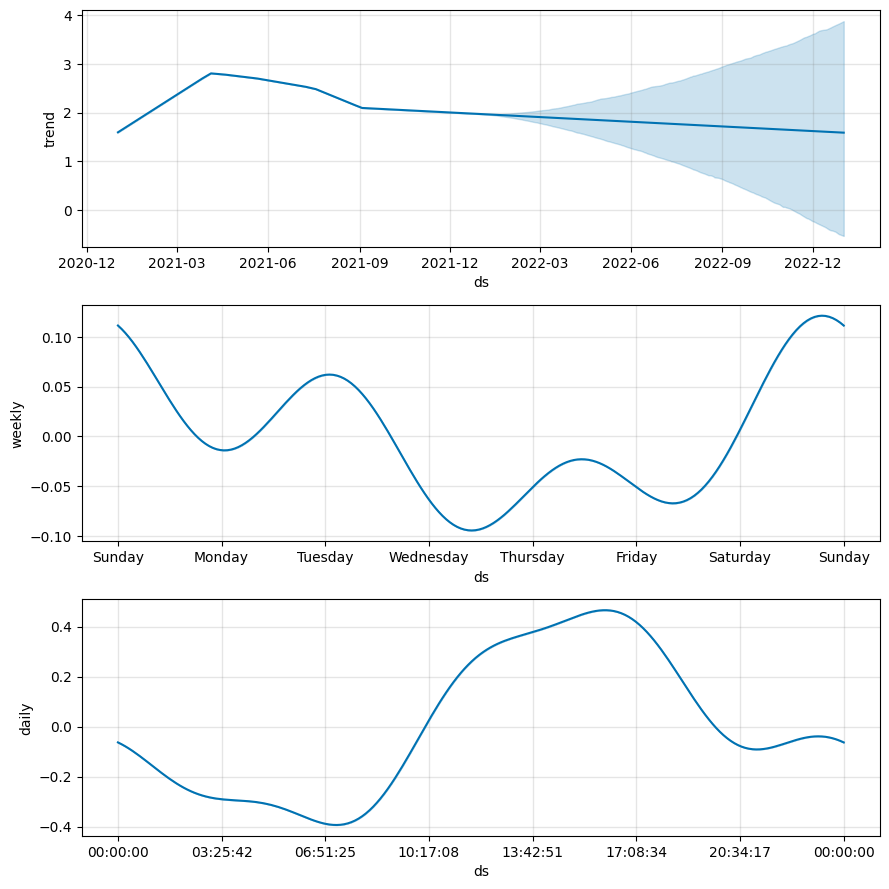

In [148]:
#plot component wise forecast
fig2 = model.plot_components(forecast)

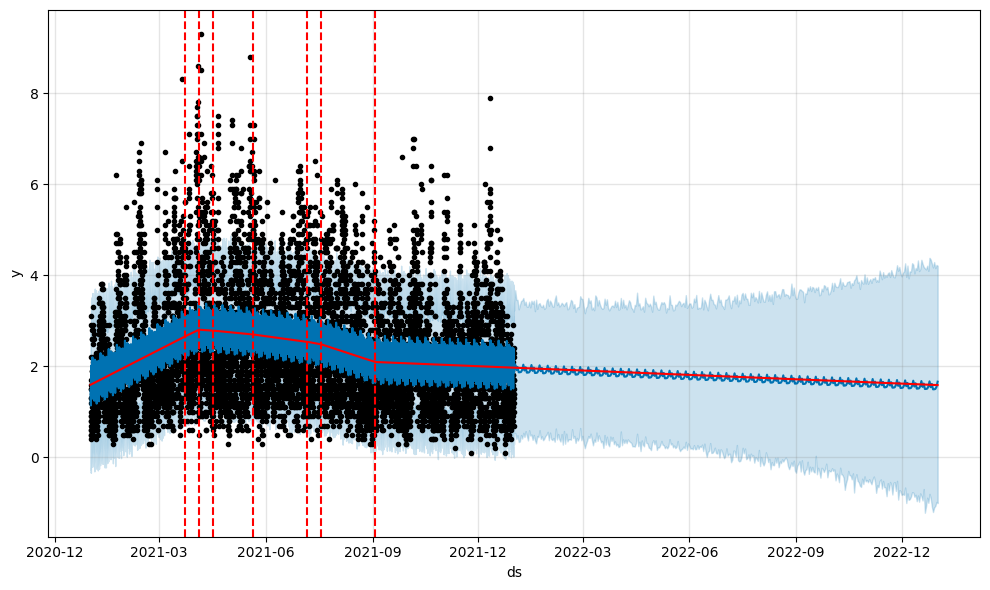

In [149]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [150]:
model.changepoints

280    2021-01-12 16:00:00
561    2021-01-24 09:00:00
841    2021-02-05 01:00:00
1121   2021-02-16 17:00:00
1401   2021-02-28 09:00:00
1682   2021-03-12 02:00:00
1962   2021-03-23 18:00:00
2242   2021-04-04 10:00:00
2523   2021-04-16 03:00:00
2803   2021-04-27 19:00:00
3083   2021-05-09 11:00:00
3363   2021-05-21 03:00:00
3644   2021-06-01 20:00:00
3924   2021-06-13 12:00:00
4204   2021-06-25 04:00:00
4484   2021-07-06 20:00:00
4765   2021-07-18 13:00:00
5045   2021-07-30 05:00:00
5325   2021-08-10 21:00:00
5606   2021-08-22 14:00:00
5886   2021-09-03 06:00:00
6166   2021-09-14 22:00:00
6446   2021-09-26 14:00:00
6727   2021-10-08 07:00:00
7007   2021-10-19 23:00:00
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -114.085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13901.7    0.00546512       283.373           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194       13909.4   0.000222327       189.238   1.217e-06       0.001      271  LS failed, Hessian reset 
     199         13910      0.011673       134.027           1           1      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       13911.2   0.000119743       126.987   1.031e-06       0.001      380  LS failed, Hessian reset 
     289       13911.4   0.000125688       105.144   1.836e-06       0.001      478  LS failed, Hessian reset 
     299       13911.4   0.000115963       86.2381           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



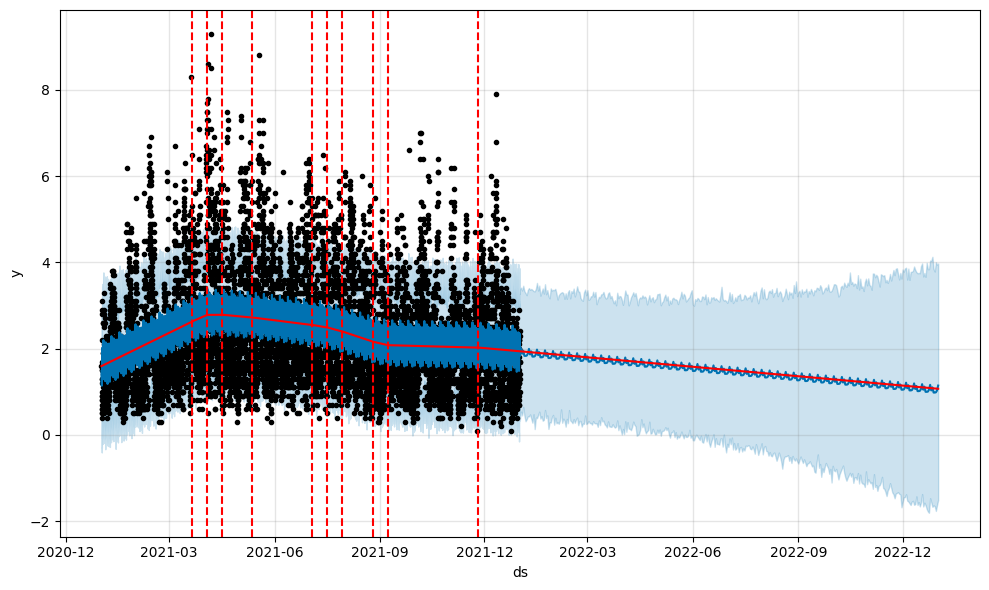

In [151]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_df).predict(future)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -114.085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       14066.2   0.000146247       87.5518     2.4e-06       0.001      139  LS failed, Hessian reset 
      99       14066.2   2.84953e-06       56.1757      0.1594      0.1594      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       14066.2   3.95564e-07       43.9147      0.3062      0.3062      176   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/riccardobaratin/Library/Python/3.8/lib/python/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



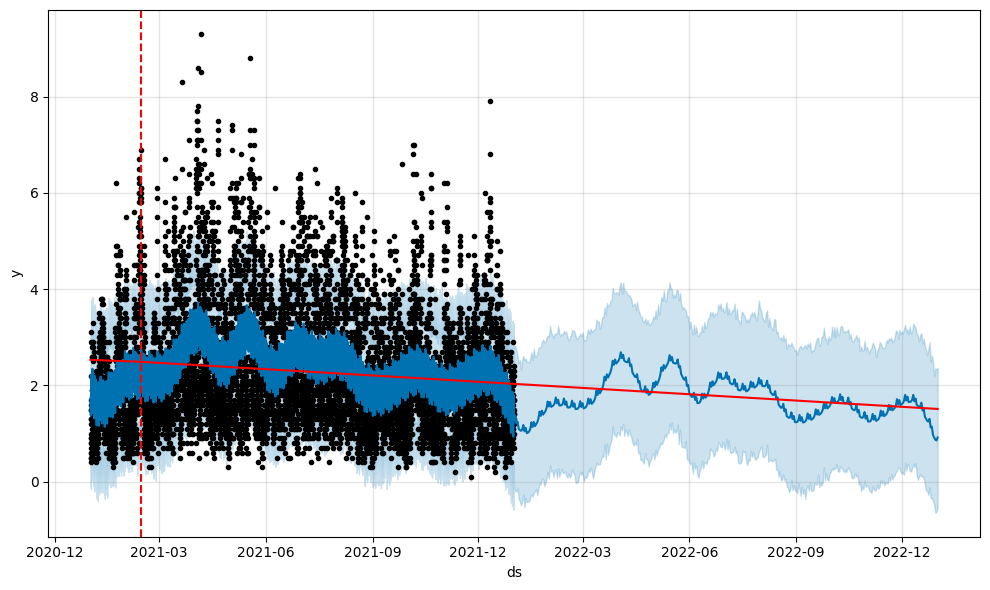

In [152]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_df).predict(future)
fig= pro_change.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)